# ps

> persistent scatterers identification

In [ ]:
#| default_exp ps

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
import zarr
from matplotlib import pyplot as plt
import colorcet

In [ ]:
#| export
import cupy as cp
import numpy as np
from typing import Union
import math

In [ ]:
#| export
def amp_disp(rslc:Union[cp.ndarray,np.ndarray], # rslc stack
            )-> Union[cp.ndarray,np.ndarray]: # dispersion index
    '''calculation the amplitude dispersion index from SLC stack.'''
    xp = cp.get_array_module(rslc)
    rmli = xp.abs(rslc)
    mean = xp.nanmean(rmli,axis=2)
    std = xp.nanstd(rmli,axis=2)
    return std/mean

Using amplitude dispersion index (ADI) to identify persistent scatterers is first used in [@ferrettiPermanentScatterersSAR2001].

In [ ]:
rslc = zarr.open('../../data/rslc.zarr/','r')[:]
adi = amp_disp(rslc)

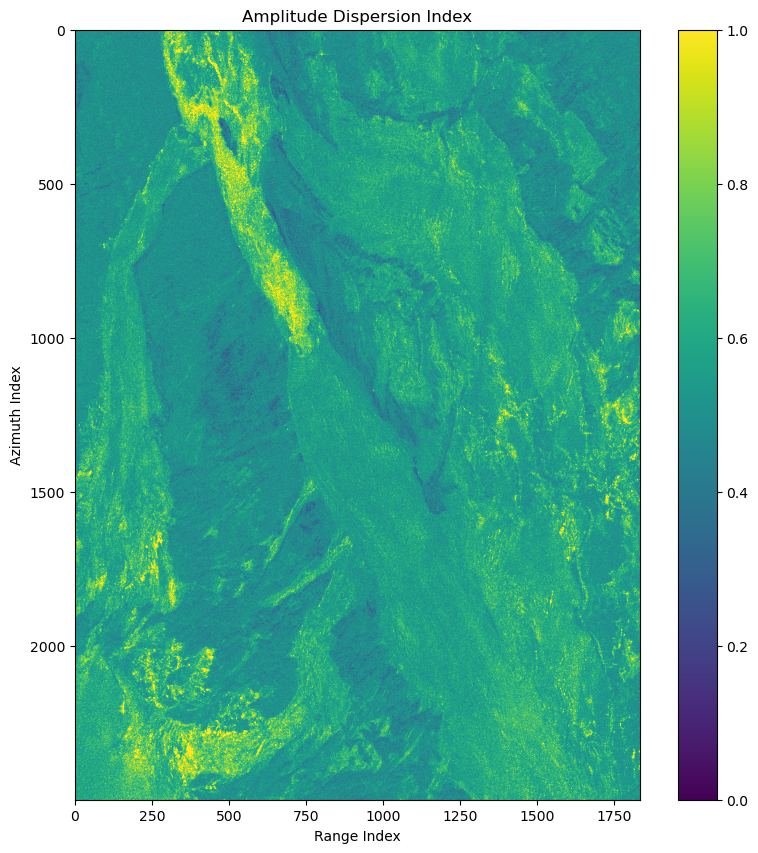

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm = ax.imshow(adi,vmin=0,vmax=1)
ax.set(title='Amplitude Dispersion Index',xlabel='Range Index',ylabel='Azimuth Index')
fig.colorbar(pcm)
fig.show()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()